# $\Omega$ Pandas

> `pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

> `pandas` is well suited for many different kinds of data:

> * Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

For more tutorials, visit: https://pandas.pydata.org/pandas-docs/stable/tutorials.html

### Imports

Here we import Pandas and Matplotlib for data visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read data

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

We load the data in using Pandas and create a Dataframe called `titanic`.

In [ ]:
# local
titanic = pd.read_csv('data/titanic.csv')

### Help

Jupyter provides a **magic** command to look at the documentation of a function by adding a question mark.

In [ ]:
pd.read_csv?

### Get first n rows

In [ ]:
titanic.head()

### Dataframe dimensions

Get the number of rows and columns. `(rows, columns)`

In [ ]:
titanic.shape

### Index

The index is set to [0, 1, 2...nrows] by default if you don't specify it.

In [ ]:
titanic.index

Let's consult pd to learn more about indices.

In [ ]:
titanic.set_index?

In [ ]:
titanic.reset_index?

### Columns

In [ ]:
titanic.columns

### Dataframe information

Show some general information about your dataframe like the column names, the type, the number of non-missing values as well as the memory usage. Pandas Dataframes are loaded entirely into memory.

In [ ]:
titanic.info()

### Values

In [ ]:
titanic.values

### Summary statistics for numeric columns

By default `describe` will include only numeric columns. By setting `include='all'` it also shows all types.

In [ ]:
titanic.describe(include='all')

# $\Omega$ Selecting Data

### Select column

In [ ]:
titanic['name']

### Select multiple columns

In [ ]:
titanic[['name', 'fare']]

### Select rows and columns by name

Use `loc` to slice your data. The first parameter is the names of the indices (this can be a range) and the second is a column or a list of columns.

In [ ]:
titanic.loc[10:20, ['name', 'fare']]

### Select rows and columns by range of indices

The difference with `iloc` is instead of using the **names** of the indices or columns, it uses the **integer positions**. For example instead selecting the 'age' column, we can select the column in position 4.

In [ ]:
titanic.iloc[10:20, 0:3]

### Select rows based on condition (filter)

In [ ]:
titanic[titanic['fare'] > 100]

## $\Delta$ Exercise 1 - Toronto Subway Delay Data

https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#917dd033-1fe5-4ba8-04ca-f683eec89761

**Deliverables:**
1. Read the data `subway.csv` and set it to the variable `subway`
2. Show the last 10 rows (hint: use `tail`)
3. Show the summary statistics
4. Select columns "Date" and "Time" for rows 100 to 200

In [ ]:
########################
# Your Code Below
########################

# $\Omega$ Transforming Data

### Calculate ticket price in today's dollar
According to the Bureau of Labor Statistics consumer price index, prices in 2018 are 2,669.00% higher than prices in 1909. The dollar experienced an average inflation rate of 3.09% per year.

In [ ]:
titanic['fare'] * 26.69

In [ ]:
(titanic['fare'] * 26.69).round(2)

### Add new column

In [ ]:
titanic['fare_2018'] = (titanic['fare'] * 26.69).round(2)

### Count missing values

In [ ]:
titanic.isnull().sum()

### Calculate mean

In [ ]:
titanic['age'].mean()

In [ ]:
mean_age = titanic['age'].mean()

### Fill missing values

In [ ]:
titanic['age'] = titanic['age'].fillna(mean_age).round(0).astype(int)

### Count categorical data

In [ ]:
titanic['gender'].value_counts()

### Groupby & aggregate

In [ ]:
titanic.groupby('gender')['survived'].sum()

In [ ]:
titanic['is_child'] = titanic['age'] < 18

In [ ]:
titanic.groupby('is_child')['survived'].sum()

### Save new dataframe as csv

In [ ]:
# titanic.to_csv('data/new_titanic.csv')

## $\Delta$ Exercise 2 - Subway Dataset

Some helpful functions:
- `pd.to_datetime`
- `.dt.year`
- `.dt.month`
- `.dt.dayofweek`
- `.dt.hour`

**Deliverables:**
1. Convert `Date` to a datetime object and replace the old one
2. Create a new column called `year`
3. Create a new column called `month`
4. Create a new column called `dayofweek`
5. Create a new column called `label` with value `0` if the `Min Delay` is less than 5 and `1` if it's greater than or equal to 5
6. Print the type of every column
7. Print new summary statistics

In [ ]:
########################
# Your Code Below
########################

# $\Omega$ Data Visualization
https://pandas.pydata.org/pandas-docs/stable/visualization.html

### Bar plot

In [ ]:
titanic['survived'].value_counts().plot(kind='bar')

### Pie plot

In [ ]:
titanic['survived'].value_counts().plot(kind='pie')

### Set figure size

In [ ]:
titanic['survived'].value_counts().plot(kind='pie', figsize=(5, 5))

### Set plot style

In [ ]:
plt.style.use('ggplot')

In [ ]:
titanic['survived'].value_counts().plot(kind='pie', figsize=(5, 5))

### Histogram

In [ ]:
titanic['age'].plot(kind='hist')

### Set histogram bin size

In [ ]:
titanic['age'].plot(kind='hist', bins=100)

### Boxplot

In [ ]:
titanic['fare'].plot(kind='box')

### Scatter plot

In [ ]:
titanic[['fare', 'age']].plot(x='age', y='fare', kind='scatter')

### Transform then plot

In [ ]:
titanic.groupby('gender')['survived'].sum().plot(kind='bar')

## $\Delta$ Exercise 3 - Subway Dataset

**Deliverables:**
1. Create a bar plot of `label`
2. Create a histogram of `Min Delay`
3. Create a boxplot of `Min Delay`
4. Plot the 10 most frequent `Codes`
5. Plot the 10 `Codes` that have the most delays over 5 minutes

**Bonus:**
- Explore the dataset and see if you can come up with your own interesting analysis or plots

In [ ]:
########################
# Your Code Below
########################

# $\Omega$ Machine Learning

http://scikit-learn.org/stable/user_guide.html

https://docs.google.com/presentation/d/1HDCbQ7-Abh3wi0L4Dg4i8V1orovsatKX_LgeQ85t_HY/edit#slide=id.p

- `pip install scikit-plot`
- `pip install mlxtend`

In [ ]:
!pip install scikit-plot
!pip install mlxtend

In [24]:
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import category_scatter
from mlxtend.plotting import plot_decision_regions

import scikitplot as skplt

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
X, y = make_blobs(centers=[[1, 1], [3, 3]], random_state=1)

df = pd.DataFrame(X, columns=['feature1', 'feature2']).assign(label=y)

df.head()

In [ ]:
category_scatter(x='feature1', y='feature2', label_col='label', data=df);

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=1)
d_tree.fit(X, y)

plot_decision_regions(X, y, clf=d_tree);

### Titanic 

In [ ]:
titanic.head()

### Selecting features

In [ ]:
features = ['gender', 'fare', 'age', 'is_child']

titanic[features]

### One hot encoding

In [ ]:
titanic['gender']

In [ ]:
pd.get_dummies(titanic['gender'])

### Make feature dataset

In [ ]:
X = pd.get_dummies(titanic[features], drop_first=True)
X.head()

### Make label

In [ ]:
y = titanic['survived']
y.head()

### Make validation dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Build/train model

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

### Model accuracy

In [ ]:
model.score(X_test, y_test)

### Model prediction

In [ ]:
y_pred = model.predict(X_test)

### Model evaluation

In [ ]:
y_pred[:10]

In [ ]:
y_test[:10]

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
skplt.estimators.plot_feature_importances(model, feature_names=X.columns)

## $\Delta$ Exercise 4 - Subway Dataset

**Deliverables:**
1. Create a list of features: Day, Code, Station, Bound, Line, month, year
2. One hot encode the categorical features
3. Create the feature set called `X`
4. Create the target label `y` (delays over 5 minuties)
5. Train and evaluate a model
6. Randomly train 10 models and average their results

# More Productive ML

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_model = RandomForestClassifier(n_estimators=25)
scores = cross_val_score(cv_model, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### Scoring Functions

In [ ]:
from sklearn import metrics
scores = cross_val_score(cv_model, X, y, cv=10, scoring='f1_macro')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

More information here:

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

https://scikit-learn.org/stable/modules/cross_validation.html

## Random Forest: an ensemble model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=25)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

In [ ]:
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

More on ensemble models:

https://scikit-learn.org/stable/modules/ensemble.html

### $\Delta$ Quick Test

How does adding n_estimators influence model.score()?

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from time import time
import numpy as np

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
gs_model = RandomForestClassifier(n_estimators=25)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 4],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(gs_model, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

## $\Delta$ Exercise 5 - Subway Dataset

**Deliverable:**
1. Create an ensemble model using pipeline and grid search that would beat your last decision tree

In [ ]:
########################
# Your Code Below
########################

# Text Analytics

https://www.kaggle.com/yufengdev/bbc-text-categorization/notebook

In [4]:
bbc_articles = pd.read_csv("data/bbc-text.csv")
# fake_news_data = pd.read_csv("data/fake_news_data.csv")

In [5]:
bbc_articles.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [6]:
bbc_articles['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

### Tokenization for multiple purposes

In [8]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

In [11]:
import nltk
from nltk.corpus import stopwords
import string

# Fill any blank fields
bbc_articles.category.fillna("", inplace=True)
# fake_news_data.category.fillna("", inplace=True)

all_text = bbc_articles.text

words = nltk.word_tokenize(" ".join(all_text.tolist()))

nltk_stopwords = stopwords.words('english') 
unigrams = [i for i in words if i not in nltk_stopwords and i.isalpha() and len(i) > 2]

NLTK is not always the best choice though!

You can try Spacy next time.

In [12]:
len(unigrams)

458124

### Wordcloud on unigrams

In [ ]:
# !pip install wordcloud

In [13]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                stopwords=STOPWORDS,
                background_color='white',
                width=2000,
                height=1000
            ).generate(" ".join(unigrams))

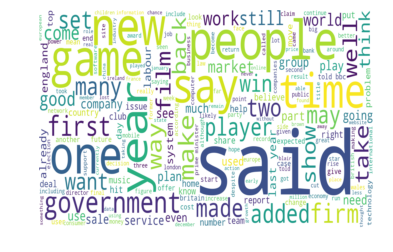

In [14]:
plt.imshow(wordcloud2, interpolation="bilinear", aspect='auto')
plt.axis('off')
plt.show()

### Can we learn more from bigrams and trigrams?

In [15]:
bigrams = nltk.bigrams(unigrams)
trigrams = nltk.trigrams(unigrams)


# look at the most common. 

from collections import Counter

bigrams_counter = Counter(bigrams)
trigrams_counter = Counter(trigrams)

In [16]:
print(len(bigrams_counter))
print('\n')
for bigram in bigrams_counter.most_common(20):
    print(bigram)

320608


(('last', 'year'), 454)
(('told', 'bbc'), 362)
(('prime', 'minister'), 312)
(('chief', 'executive'), 198)
(('said', 'would'), 198)
(('tony', 'blair'), 186)
(('last', 'week'), 184)
(('bbc', 'news'), 178)
(('general', 'election'), 172)
(('new', 'york'), 167)
(('six', 'nations'), 162)
(('number', 'one'), 141)
(('first', 'time'), 140)
(('michael', 'howard'), 130)
(('years', 'ago'), 128)
(('human', 'rights'), 118)
(('next', 'year'), 116)
(('gordon', 'brown'), 113)
(('bbc', 'radio'), 112)
(('also', 'said'), 106)


In [17]:
print(len(trigrams_counter))
print('\n')
for trigram in trigrams_counter.most_common(20):
    print(trigram)

401432


(('told', 'bbc', 'news'), 147)
(('bbc', 'news', 'website'), 97)
(('told', 'bbc', 'radio'), 76)
(('leader', 'michael', 'howard'), 58)
(('million', 'dollar', 'baby'), 53)
(('radio', 'today', 'programme'), 49)
(('told', 'bbc', 'sport'), 48)
(('bbc', 'radio', 'today'), 47)
(('tory', 'leader', 'michael'), 41)
(('next', 'general', 'election'), 39)
(('chancellor', 'gordon', 'brown'), 33)
(('leader', 'charles', 'kennedy'), 32)
(('prime', 'minister', 'tony'), 32)
(('minister', 'tony', 'blair'), 32)
(('two', 'years', 'ago'), 28)
(('world', 'number', 'one'), 27)
(('coach', 'andy', 'robinson'), 27)
(('bbc', 'world', 'service'), 26)
(('london', 'stock', 'exchange'), 25)
(('deputy', 'prime', 'minister'), 23)


## Pipeline

Scikit-learn provides a pipeline utility to help automate machine learning workflows. Pipelines are very common in Machine Learning systems, since there is a lot of data to manipulate and many data transformations to apply. So we will utilize pipeline to train every classifier.

https://towardsdatascience.com/multi-label-text-classification-with-scikit-learn-30714b7819c5

#### What do we need in order to define a pipeline?

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

import string
import re
import spacy
from spacy.lang.en import English
parser = English()

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [20]:
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS)+ list(STOPWORDS))
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”"]
class CleanTextTransformer(TransformerMixin):
   def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
   def fit(self, X, y=None, **fit_params):
        return self
def get_params(self, deep=True):
        return {}
    
def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text
def tokenizeText(sample):
    tokens = parser(sample)
    lemmas = []
    for tok in tokens:
        lemmas.append(tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_)
    tokens = lemmas
    tokens = [tok for tok in tokens if tok not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    return tokens

##### Alternative cleaning:
https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

In [35]:
count_vect = CountVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
tfidf_vect = TfidfVectorizer(tokenizer=tokenizeText, ngram_range=(1,3))
count_clf = LinearSVC()
tfidf_clf = LinearSVC()

##### How about other classifiers?
https://www.kaggle.com/paul92s/linear-svc-classifier

In [36]:
count_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', count_vect),
    ('clf', count_clf)
])

tfidf_pipe = Pipeline([
    ('cleanText', CleanTextTransformer()),
    ('vectorizer', tfidf_vect),
    ('clf', tfidf_clf)
])

In [37]:
X = bbc_articles['text']
y = bbc_articles['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2018)

In [38]:
X_train.sample(10)

1732    mobiles  not media players yet  mobiles are no...
2187    jones files conte lawsuit marion jones has fil...
1752    abba reunite for musical premiere the original...
847     bbc  should allow more scrutiny  mps have urge...
576     robots learn  robotiquette  rules robots are l...
2124    tate & lyle boss bags top award tate & lyle s ...
1601    castaignede fires laporte warning former franc...
782     bollywood draws global stars british actress a...
68      microsoft gets the blogging bug software giant...
1782    clarke plans migrant point scheme anyone plann...
Name: text, dtype: object

In [49]:
count_pipe.fit(X_train, y_train)
count_preds = count_pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, count_preds))

Accuracy: 0.9591836734693877


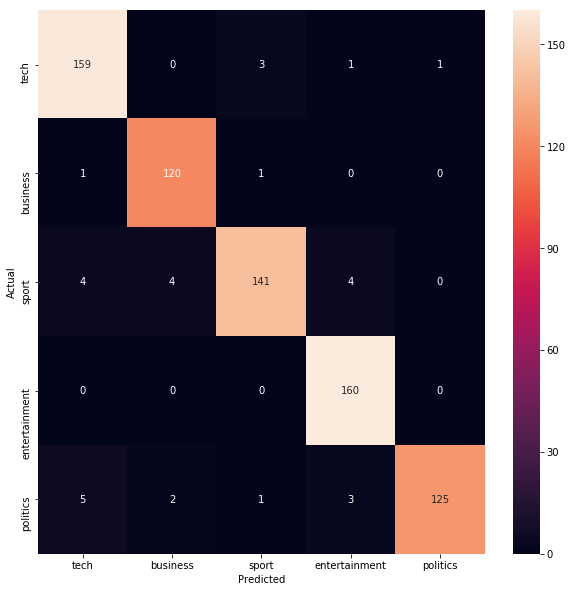

In [55]:
count_conf_mat = confusion_matrix(y_test, count_preds)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(count_conf_mat, annot=True, fmt='d',
            xticklabels=bbc_articles['category'].unique(), yticklabels=bbc_articles['category'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [57]:
tfidf_transform = tfidf_pipe.fit(X_train, y_train)
tfidf_preds = tfidf_pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, tfidf_preds))

Accuracy: 0.9727891156462585


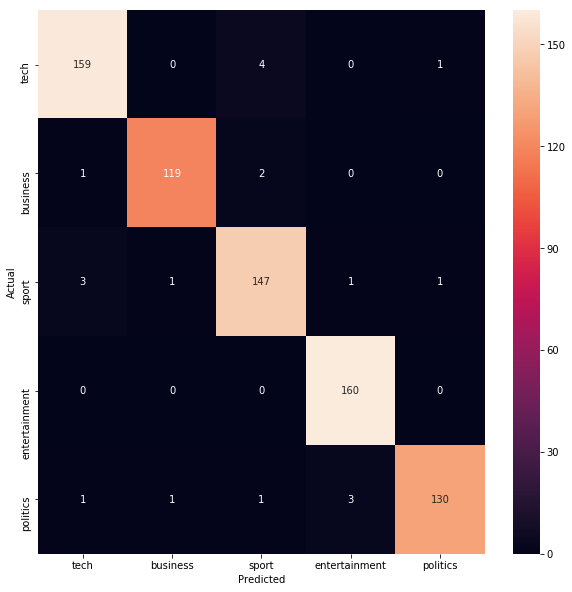

In [58]:
tfidf_conf_mat = confusion_matrix(y_test, tfidf_preds)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(tfidf_conf_mat, annot=True, fmt='d',
            xticklabels=bbc_articles['category'].unique(), yticklabels=bbc_articles['category'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## POS

In [69]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u'Apple is looking at buying U.K. startup for $1 billion')
for token in doc:
    print("{", token.text, "-->: ", token.lemma_, "}", token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

In [79]:
doc = nlp(bbc_articles.loc[0]['text'])
for token in doc:
    print("{", token.text, "-->: ", token.lemma_, "}", token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

<class 'spacy.tokens.doc.Doc'>
{ tv -->:  tv } NOUN NN compound xx True False
{ future -->:  future } NOUN NN nsubj xxxx True False
{ in -->:  in } ADP IN prep xx True True
{ the -->:  the } DET DT det xxx True True
{ hands -->:  hand } NOUN NNS pobj xxxx True False
{ of -->:  of } ADP IN prep xx True True
{ viewers -->:  viewer } NOUN NNS pobj xxxx True False
{ with -->:  with } ADP IN prep xxxx True True
{ home -->:  home } NOUN NN compound xxxx True False
{ theatre -->:  theatre } NOUN NN compound xxxx True False
{ systems -->:  system } NOUN NNS nmod xxxx True False
{   -->:    } SPACE     False False
{ plasma -->:  plasma } NOUN NN compound xxxx True False
{ high -->:  high } ADJ JJ amod xxxx True False
{ - -->:  - } PUNCT HYPH punct - False False
{ definition -->:  definition } NOUN NN nmod xxxx True False
{ tvs -->:  tvs } NOUN NN nmod xxx True False
{   -->:    } SPACE     False False
{ and -->:  and } CCONJ CC cc xxx True True
{ digital -->:  digital } ADJ JJ conj xxxx True Fa

{ business -->:  business } NOUN NN attr xxxx True False
{ in -->:  in } ADP IN prep xx True True
{ japan -->:  japan } NOUN NN pobj xxxx True False
{ and -->:  and } CCONJ CC cc xxx True True
{ the -->:  the } DET DT det xxx True True
{ us -->:  -PRON- } PRON PRP conj xx True True
{   -->:    } SPACE     False False
{ but -->:  but } CCONJ CC cc xxx True True
{ slower -->:  slow } ADJ JJR conj xxxx True False
{ to -->:  to } PART TO aux xx True True
{ take -->:  take } VERB VB relcl xxxx True True
{ off -->:  off } PART RP prt xxx True True
{ in -->:  in } ADP IN prep xx True True
{ europe -->:  europe } NOUN NN pobj xxxx True False
{ because -->:  because } ADP IN prep xxxx True True
{ of -->:  of } ADP IN pcomp xx True True
{ the -->:  the } DET DT det xxx True True
{ lack -->:  lack } NOUN NN pobj xxxx True False
{ of -->:  of } ADP IN prep xx True True
{ high -->:  high } ADJ JJ amod xxxx True False
{ - -->:  - } PUNCT HYPH punct - False False
{ definition -->:  definition } NOUN 

{ at -->:  at } ADP IN prep xx True True
{ the -->:  the } DET DT det xxx True True
{ moment -->:  moment } NOUN NN pobj xxxx True False
{ for -->:  for } ADP IN prep xxx True True
{ commercial -->:  commercial } ADJ JJ amod xxxx True False
{ uk -->:  uk } ADJ JJ intj xx True False
{ broadcasters -->:  broadcaster } NOUN NNS pobj xxxx True False
{   -->:    } SPACE     False False
{ but -->:  but } CCONJ CC cc xxx True True
{ brand -->:  brand } NOUN NN compound xxxx True False
{ loyalty -->:  loyalty } NOUN NN nsubj xxxx True False
{ is -->:  be } VERB VBZ conj xx True True
{ important -->:  important } ADJ JJ acomp xxxx True False
{ for -->:  for } ADP IN prep xxx True True
{ everyone -->:  everyone } NOUN NN pobj xxxx True True
{ . -->:  . } PUNCT . punct . False False
{   -->:    } SPACE     False False
{ we -->:  -PRON- } PRON PRP nsubj xx True True
{ will -->:  will } VERB MD aux xxxx True True
{ be -->:  be } VERB VB aux xx True True
{ talking -->:  talk } VERB VBG ROOT xxxx Tru

{ and -->:  and } CCONJ CC cc xxx True True
{ what -->:  what } NOUN WP dobj xxxx True True
{ they -->:  -PRON- } PRON PRP nsubj xxxx True True
{ play -->:  play } VERB VBP conj xxxx True False
{ on -->:  on } ADP IN prep xx True True
{ them -->:  -PRON- } PRON PRP pobj xxxx True True
{ . -->:  . } PUNCT . punct . False False
{ but -->:  but } CCONJ CC cc xxx True True
{ it -->:  -PRON- } PRON PRP nsubj xx True True
{ might -->:  may } VERB MD aux xxxx True True
{ not -->:  not } ADV RB neg xxx True True
{ suit -->:  suit } VERB VB ROOT xxxx True False
{ everyone -->:  everyone } NOUN NN dobj xxxx True True
{   -->:    } SPACE     False False
{ the -->:  the } DET DT det xxx True True
{ panel -->:  panel } NOUN NN nsubj xxxx True False
{ recognised -->:  recognise } VERB VBD relcl xxxx True False
{ . -->:  . } PUNCT . punct . False False
{ older -->:  old } ADJ JJR amod xxxx True False
{ generations -->:  generation } NOUN NNS nsubj xxxx True False
{ are -->:  be } VERB VBP ROOT xxx Tr

{ . -->:  . } PUNCT . punct . False False
{ one -->:  one } NUM CD nsubj xxx True True
{ of -->:  of } ADP IN prep xx True True
{ the -->:  the } DET DT det xxx True True
{ us -->:  -PRON- } PRON PRP poss xx True True
{ s -->:  s } VERB VBZ case x True False
{ biggest -->:  big } ADJ JJS amod xxxx True False
{ satellite -->:  satellite } NOUN NN compound xxxx True False
{ tv -->:  tv } NOUN NN compound xx True False
{ companies -->:  company } NOUN NNS pobj xxxx True False
{   -->:    } SPACE     False False
{ directtv -->:  directtv } NOUN NN pobj xxxx True False
{   -->:    } SPACE     False False
{ has -->:  have } VERB VBZ aux xxx True True
{ even -->:  even } ADV RB advmod xxxx True True
{ launched -->:  launch } VERB VBN ROOT xxxx True False
{ its -->:  -PRON- } ADJ PRP$ poss xxx True True
{ own -->:  own } ADJ JJ amod xxx True True
{ branded -->:  brand } VERB VBN dobj xxxx True False
{ dvr -->:  dvr } ADP IN advmod xxx True False
{ at -->:  at } ADP IN prep xx True True
{ the -

## NER

In [66]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [81]:
# doc = nlp(u'Apple is looking at buying U.K. startup for $1 billion')
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


In [82]:
doc = nlp(bbc_articles.loc[0]['text'])
print([(X.text, X.label_) for X in doc.ents])

[('five years  time', 'DATE'), ('annual', 'DATE'), ('one', 'CARDINAL'), (' ', 'NORP'), (' ', 'NORP'), (' ', 'NORP'), ('one', 'CARDINAL'), (' ', 'NORP'), (' ', 'NORP'), (' ', 'NORP'), (' ', 'NORP'), (' ', 'NORP'), ('japan', 'GPE'), (' ', 'NORP'), (' ', 'NORP'), (' ', 'NORP'), (' ', 'NORP'), ('today', 'DATE'), (' ', 'NORP'), ('nine months to a years', 'DATE'), (' ', 'NORP'), ('  ', 'ORG'), ('  ', 'ORG'), (' ', 'ORG'), (' ', 'NORP'), (' ', 'ORG'), (' ', 'NORP'), (' ', 'NORP'), (' ', 'NORP'), (' ', 'NORP'), (' ', 'NORP'), ('  ', 'ORG'), (' ', 'ORG'), (' ', 'NORP'), ('50 000', 'CARDINAL'), ('one', 'CARDINAL'), ('80-hour', 'CARDINAL'), ('one', 'CARDINAL'), (' ', 'NORP'), (' ', 'ORG'), ('100-hours', 'CARDINAL'), (' ', 'NORP'), (' ', 'PERSON'), ('up to 90 hours', 'TIME')]


# More reading for further:

https://nlpoverview.com
https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/